# Advanced Data Analysis: Downloading Financial Data

In this notebook, we will cover several methods for downloading financial data from free and accessible sources. This is particularly useful in financial analysis, machine learning models, and time-series forecasting. We'll use Python packages like yfinance, pandas_datareader, and explore some alternative APIs for free data collection.

1. Introduction to Financial Data in Python
Python offers several robust libraries that allow you to download stock market data, including historical stock prices, trading volumes, and other key financial metrics. This notebook will guide you through getting data:

We will cover the following data sources:
1. **Yahoo Finance** (Stock prices, indices, and more)
2. **Alpha Vantage** (Stock, forex, crypto)
3. **FRED** (Economic data)
4. **Fama-French** (Factor models and asset pricing)
5. **Stooq** (Stock, forex, crypto)


In [1]:
# imports
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web

# Data Source 1: Yahoo Finance
Yahoo Finance provides free stock data and is easy to use with Python via the yfinance package.

In [2]:
import yfinance as yf

# Downloading historical data for Apple (AAPL) from 2010 onwards
data = yf.download('AAPL', start='2010-01-01')
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454504,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465664,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362819,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351057,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800


### Explanation
- The `yf.download` method retrieves historical data for the specified ticker symbol (e.g., 'AAPL' for Apple).
- You can specify the start and end dates to control the time period of the data you want.
- This data includes Open, High, Low, Close prices, Adjusted Close prices, and trading Volume.


# Data Source 2: Alpha Vantage
### Alpha Vantage API Overview
Alpha Vantage provides real-time and historical data on stocks, forex, and cryptocurrencies. You need an API key to use it, but the free tier allows for 500 requests per day, which is suitable for most basic use cases.

First, you'll need to sign up on [Alpha Vantage](https://www.alphavantage.co) and obtain an API key. Install the necessary Python library using:


In [3]:
# !pip install alpha_vantage

### Code to Download Data from Alpha Vantage
In the following example, we will download daily stock price data for Tesla (TSLA).


In [4]:
from alpha_vantage.timeseries import TimeSeries

# Replace 'your_api_key' with your actual Alpha Vantage API key
api_key = 'your_api_key'
ts = TimeSeries(key=api_key, output_format='pandas')

# Download daily data for Tesla
data, meta_data = ts.get_daily(symbol='TSLA', outputsize='full')

# Create a new column with the ticker
data['ticker'] = 'TSLA'

# Display the data
data.head()

,1. open,2. high,3. low,4. close,5. volume,ticker
date,,,,,,
2024-10-01,262.670,263.9800,248.53,258.02,87397613.0,TSLA
2024-09-30,259.040,264.8600,255.77,261.63,80873381.0,TSLA
2024-09-27,257.375,260.6999,254.12,260.46,70988067.0,TSLA
2024-09-26,260.600,261.7500,251.53,254.22,67142193.0,TSLA
2024-09-25,252.540,257.0500,252.28,257.02,65034318.0,TSLA


### Explanation
- The `TimeSeries` object is used to interact with the Alpha Vantage API.
- We call `get_daily` to retrieve daily stock price data for Tesla ('TSLA').
- The `outputsize='full'` argument fetches the complete history of daily stock prices.


## Lets use Alpha Vantage to get some fundamental data

For this we are going to use a simple request. It works the best for this data. 

In [5]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=EARNINGS&symbol=IBM&apikey=demo'
r = requests.get(url)
earnings_data = r.json()

print(earnings_data)

{'symbol': 'IBM', 'annualEarnings': [{'fiscalDateEnding': '2024-09-30', 'reportedEPS': '4.11'}, {'fiscalDateEnding': '2023-12-31', 'reportedEPS': '9.61'}, {'fiscalDateEnding': '2022-12-31', 'reportedEPS': '9.12'}, {'fiscalDateEnding': '2021-12-31', 'reportedEPS': '9.97'}, {'fiscalDateEnding': '2020-12-31', 'reportedEPS': '8.67'}, {'fiscalDateEnding': '2019-12-31', 'reportedEPS': '12.81'}, {'fiscalDateEnding': '2018-12-31', 'reportedEPS': '13.82'}, {'fiscalDateEnding': '2017-12-31', 'reportedEPS': '13.65'}, {'fiscalDateEnding': '2016-12-31', 'reportedEPS': '13.6'}, {'fiscalDateEnding': '2015-12-31', 'reportedEPS': '14.93'}, {'fiscalDateEnding': '2014-12-31', 'reportedEPS': '16.27'}, {'fiscalDateEnding': '2013-12-31', 'reportedEPS': '17.03'}, {'fiscalDateEnding': '2012-12-31', 'reportedEPS': '15.3'}, {'fiscalDateEnding': '2011-12-31', 'reportedEPS': '13.49'}, {'fiscalDateEnding': '2010-12-31', 'reportedEPS': '11.58'}, {'fiscalDateEnding': '2009-12-31', 'reportedEPS': '10.01'}, {'fiscalDa

In [6]:
earnings_data

{'symbol': 'IBM',
 'annualEarnings': [{'fiscalDateEnding': '2024-09-30', 'reportedEPS': '4.11'},
  {'fiscalDateEnding': '2023-12-31', 'reportedEPS': '9.61'},
  {'fiscalDateEnding': '2022-12-31', 'reportedEPS': '9.12'},
  {'fiscalDateEnding': '2021-12-31', 'reportedEPS': '9.97'},
  {'fiscalDateEnding': '2020-12-31', 'reportedEPS': '8.67'},
  {'fiscalDateEnding': '2019-12-31', 'reportedEPS': '12.81'},
  {'fiscalDateEnding': '2018-12-31', 'reportedEPS': '13.82'},
  {'fiscalDateEnding': '2017-12-31', 'reportedEPS': '13.65'},
  {'fiscalDateEnding': '2016-12-31', 'reportedEPS': '13.6'},
  {'fiscalDateEnding': '2015-12-31', 'reportedEPS': '14.93'},
  {'fiscalDateEnding': '2014-12-31', 'reportedEPS': '16.27'},
  {'fiscalDateEnding': '2013-12-31', 'reportedEPS': '17.03'},
  {'fiscalDateEnding': '2012-12-31', 'reportedEPS': '15.3'},
  {'fiscalDateEnding': '2011-12-31', 'reportedEPS': '13.49'},
  {'fiscalDateEnding': '2010-12-31', 'reportedEPS': '11.58'},
  {'fiscalDateEnding': '2009-12-31', 'rep

In [7]:
earnings_data.keys()

dict_keys(['symbol', 'annualEarnings', 'quarterlyEarnings'])

As we can see, these are what's included. 
Lets take a look at the annual earnings, and I'll go ahead and make it into a Pandas DataFrame straight away to make it simpler. 

In [8]:
earnings_data = pd.DataFrame(earnings_data['annualEarnings'])
earnings_data.index = pd.to_datetime(earnings_data['fiscalDateEnding'])
earnings_data = earnings_data.drop(columns=['fiscalDateEnding'])

# We need to make sure the reported EPS are numbers and not anything else. For plotting
earnings_data['reportedEPS'] = earnings_data['reportedEPS'].astype(float)

# We also need to use this trick to reverse the order of the dataframe
earnings_data = earnings_data[::-1]

earnings_data.head(5)

,reportedEPS
fiscalDateEnding,
1996-12-31,2.77
1997-12-31,3.09
1998-12-31,3.32
1999-12-31,3.71
2000-12-31,4.45


# Data Source 3: FRED (Federal Reserve Economic Data)
### FRED API Overview
FRED, provided by the Federal Reserve Bank of St. Louis, is a vast resource for economic data, including interest rates, GDP, inflation, unemployment rates, and more. The data is often used for macroeconomic analysis and financial modeling.

## <b><u>Find data here: https://fred.stlouisfed.org/</u></b>

In [9]:
import pandas_datareader.data as web
import datetime

# Set the start and end dates for the data
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2023, 1, 1)

# Fetch the U.S. Unemployment Rate (UNRATE) from FRED
unemployment_rate = web.DataReader('UNRATE', 'fred', start, end)

# Fetch the 10-Year Treasury Constant Maturity Rate (DGS10) from FRED
treasury_rate = web.DataReader('DGS10', 'fred', start, end)

# Display the first few rows of each dataset
print("U.S. Unemployment Rate:")
unemployment_rate.head()

U.S. Unemployment Rate:


,UNRATE
DATE,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0


In [10]:
print("\n10-Year Treasury Rate:")
treasury_rate.head()


10-Year Treasury Rate:


,DGS10
DATE,
2000-01-03,6.58
2000-01-04,6.49
2000-01-05,6.62
2000-01-06,6.57
2000-01-07,6.52


### Explanation
- The `web.DataReader()` method from the `pandas_datareader` library allows you to easily access economic data from FRED.
- `UNRATE` is the code for the U.S. unemployment rate, and `DGS10` is the code for the 10-year Treasury constant maturity rate.
- You can set the `start` and `end` dates to specify the range of data you want to retrieve.
- Both datasets are returned as pandas DataFrames, which makes them easy to manipulate for further analysis.


Let’s add another example to retrieve inflation data, such as the Consumer Price Index (CPI) for all urban consumers. This is useful for understanding inflationary trends.


In [11]:
# Fetch the Consumer Price Index (CPIAUCSL) from FRED
cpi = web.DataReader('CPIAUCSL', 'fred', start, end)

# Display the first few rows of the CPI data
print("Consumer Price Index:")
cpi.head()

Consumer Price Index:


,CPIAUCSL
DATE,
2000-01-01,169.3
2000-02-01,170.0
2000-03-01,171.0
2000-04-01,170.9
2000-05-01,171.2


### Explanation
- `CPIAUCSL` is the code for the Consumer Price Index for All Urban Consumers, which is often used to track inflation.
- The data is fetched in the same way as the unemployment rate and Treasury rate.


# Visualising the data

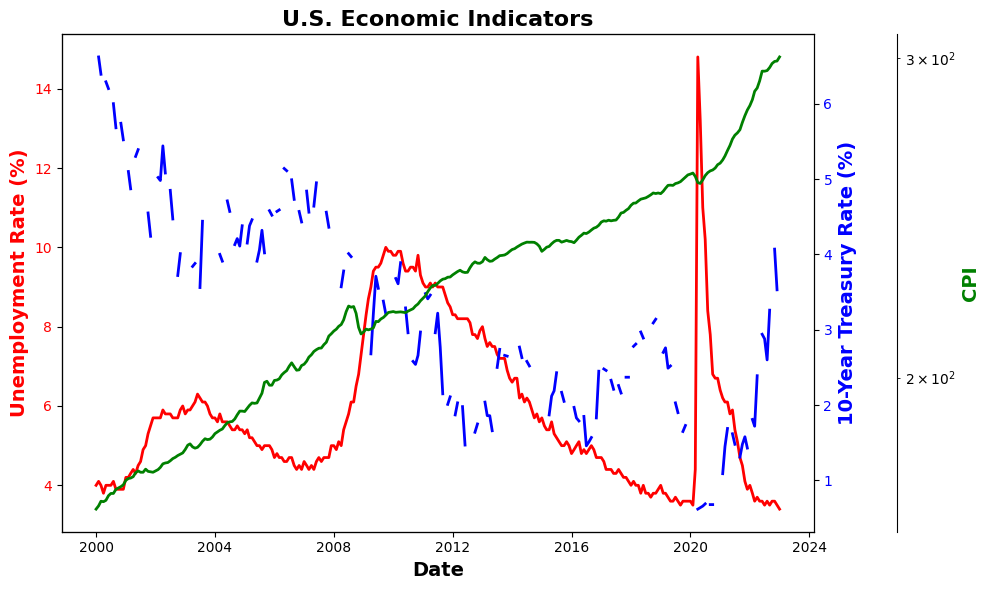

In [12]:
import matplotlib.pyplot as plt

# Combine the datasets into a single DataFrame
economic_data = unemployment_rate.join([treasury_rate, cpi])

# Rename columns for easier understanding
economic_data.columns = ['Unemployment Rate', '10-Year Treasury Rate', 'CPI']

# Display the first few rows of the combined dataset
economic_data.head()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Unemployment Rate on the first axis
ax1.set_xlabel('Date', fontsize=14, fontweight='bold')
ax1.set_ylabel('Unemployment Rate (%)', fontsize=14, fontweight='bold', color='red')
ax1.plot(economic_data.index, economic_data['Unemployment Rate'], color='red', label='Unemployment Rate', linewidth=2)
ax1.tick_params(axis='y', labelcolor='red')

# Create a second y-axis for Treasury Rate
ax2 = ax1.twinx()
ax2.set_ylabel('10-Year Treasury Rate (%)', fontsize=14, fontweight='bold', color='blue')
ax2.plot(economic_data.index, economic_data['10-Year Treasury Rate'], color='blue', label='10-Year Treasury Rate', linewidth=2)
ax2.tick_params(axis='y', labelcolor='blue')

# Create a third y-axis for CPI (scaled for log)
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis
ax3.set_ylabel('CPI', fontsize=14, fontweight='bold', color='green')
ax3.plot(economic_data.index, economic_data['CPI'], color='green', label='CPI', linewidth=2)
ax3.tick_params(axis='y', labelcolor='green')
ax3.set_yscale('log')

# Title
plt.title('U.S. Economic Indicators', fontsize=16, fontweight='bold')

# Add legends
fig.tight_layout()
plt.grid(True)
plt.show()



### Explanation:
* Normalization: We use MinMaxScaler from sklearn.preprocessing to scale all the data series between 0 and 1. This helps make them comparable on the same plot.
* Line Widths: Increased the line width for better visibility.
* Grid: Added gridlines for easier reading.

# Data Source 4: Fama-French Factor Data
### Fama-French Overview
The Fama-French three-factor model is one of the most well-known asset pricing models in finance. It extends the CAPM (Capital Asset Pricing Model) by adding size and value factors to explain stock returns.

You can download Fama-French factor data directly from the Kenneth French Data Library, which provides regular updates to various factor models, including SMB (Small Minus Big), HML (High Minus Low), and the market risk premium.

We will use the `pandas_datareader` library to easily access Fama-French data.

## Fama/French factors and portfolios
For those of you who aren't too familiar with Fama & Frenchs' factor models, don't worry, we are not focusing on this, but it's good to know how easy it is to download the data if you would like to use it. 
And what is it? Simply a model explaning stock returns, and adjusting for different things, like the SMB, stands for "Small (market capitalization) Minus Big" and adjusts returns to size. 

In [13]:
import pandas_datareader.data as web

# Get the Fama-French 3-factor data
fama_french = web.DataReader('F-F_Research_Data_Factors_daily', 'famafrench')

# Display the data
fama_french[0].head()

/tmp/ipykernel_1683/2086320419.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  fama_french = web.DataReader('F-F_Research_Data_Factors_daily', 'famafrench')


,Mkt-RF,SMB,HML,RF
Date,,,,
2019-10-04,1.39,-0.46,-0.07,0.007
2019-10-07,-0.41,0.15,-0.02,0.007
2019-10-08,-1.61,-0.13,-0.13,0.007
2019-10-09,0.92,-0.55,-0.09,0.007
2019-10-10,0.59,-0.40,0.26,0.007


### Explanation
- The `web.DataReader` method fetches data from the Kenneth French Data Library.
- In this example, we retrieve the daily Fama-French 3-factor data. The data includes the excess market return, SMB (size), and HML (value) factors.
- You can explore other factor models and time frequencies (monthly, yearly) from the same source.


### Seeing all availible datasets:
There's often a function availible to see all the datasets we can download, in this case it's the following: 

https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

In [14]:
pdr.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

# Data Source 5: Stooq 
Stooq is a free financial data platform that provides historical and real-time stock, index, commodity, and forex data. It’s well-known for offering comprehensive data coverage of major markets without requiring an API key. Stooq is particularly popular in Europe, but it also offers global financial data.

You can retrieve data from Stooq using `pandas_datareader`, which makes it a very simple and convenient option for downloading historical financial data without API limits or complex configurations. It's a great alternative when you need historical data for backtesting or other analytical purposes.

Stooq supports downloading:
- Stock price data
- Indices (e.g., S&P 500, DAX)
- Commodities (e.g., gold, oil)
- Forex (foreign exchange rates)

In [15]:
import pandas_datareader.data as pdr

# Fetch historical S&P 500 index data from Stooq
stooq_data = pdr.DataReader('^SPX', data_source='stooq', start='2010-01-01')

# Display the first few rows of the dataset
stooq_data.head()


,Open,High,Low,Close,Volume
Date,,,,,
2024-10-01,5757.73,5757.73,5681.28,5708.75,2.653015e+09
2024-09-30,5726.52,5765.14,5703.53,5762.48,2.525810e+09
2024-09-27,5755.36,5763.78,5727.34,5738.17,2.330867e+09
2024-09-26,5762.22,5767.37,5721.01,5745.37,2.772979e+09
2024-09-25,5733.65,5741.03,5712.06,5722.26,2.461681e+09


### Explanation
- `^SPX` is the symbol for the S&P 500 Index, but you can also fetch other indices, commodities, or stock data by using their respective tickers.
- The data is returned as a pandas DataFrame, making it easy to manipulate or visualize.
- Stooq is unique in that it doesn't require an API key, making it very accessible for quick data retrieval.

In this example, we download data starting from January 1, 2010.


# List of possible data sources to use:


| Source          | Data Available                          | Free Tier Limitations       | Ease of Use   | API Required |
|-----------------|-----------------------------------------|-----------------------------|---------------|--------------|
| Yahoo Finance   | Stock prices, indices, currencies        | None                        | Very easy     | No           |
| Alpha Vantage   | Stocks, forex, crypto                   | 500 requests/day            | Moderate      | Yes          |
| FRED            | Economic data, macroeconomic indicators | None                        | Moderate      | No           |
| Fama-French     | Factor models, asset pricing            | None                        | Difficult     | No           |
| Stooq           | Stock prices, indices, commodities, forex| None                        | Very easy     | No           |

### Stooq Advantages:
- **No API Key**: Unlike most data sources, Stooq does not require an API key, making it hassle-free to set up.
- **Free**: There are no limits on the number of requests for downloading data.
- **Wide Coverage**: It provides global financial data, including lesser-known markets.